## 1) Importing important libraries and dataset:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [24]:
df = pd.read_csv("F:/Data Science/Data Sets/Laptop Price Prediction/cleaned_laptop_data.csv")
df.head(2)

,Unnamed: 0,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS_Panel,Res_Per_Inches,Cpu_Brand,HDD,SSD
0,0,Apple,Ultrabook,8,Intel,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128
1,1,Apple,Ultrabook,8,Intel,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0


In [25]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [26]:
df.head(2)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS_Panel,Res_Per_Inches,Cpu_Brand,HDD,SSD
0,Apple,Ultrabook,8,Intel,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0


In [27]:
df.shape

(1235, 13)

## 2) Preprocessing:

### 1) Defining Features and Target:

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

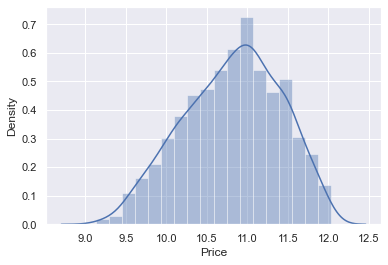

In [28]:
sns.distplot(np.log(df['Price']))

In [29]:
X = df.drop(columns=['Price'])
y = np.log(df['Price'])

### 2) Train_test_split:

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

### 3) Handling categorical variables: OneHotEncoding

In [31]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [32]:
from sklearn.preprocessing import OneHotEncoder

## 3) Model Building

In [55]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [34]:
X.head(1)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Touchscreen,IPS_Panel,Res_Per_Inches,Cpu_Brand,HDD,SSD
0,Apple,Ultrabook,8,Intel,macOS,1.37,0,1,226.983005,Intel Core i5,0,128


### 1) Linear Regression:

In [39]:
step1 = ColumnTransformer(transformers = [
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,4,9])
],remainder='passthrough')

In [40]:
step2 = LinearRegression()

In [41]:
pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

In [42]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [0, 1, 3, 4, 9])])),
                ('step2', LinearRegression())])

In [43]:
from sklearn.metrics import r2_score, mean_absolute_error

In [44]:
y_pred = pipe.predict(X_test)
print('R2 Score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 Score 0.8179369608860386
MAE 0.19966293200887247


In [45]:
np.exp(0.1996)

1.2209142947560994

### 2) Ridge Regression:

In [46]:
step1 = ColumnTransformer(transformers = [
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,4,9])
],remainder='passthrough')

step2 = Ridge(alpha=10)

pipe_2 = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe_2.fit(X_train,y_train)

y_pred_2 = pipe_2.predict(X_test)
print('R2 Score',r2_score(y_test,y_pred_2))
print('MAE',mean_absolute_error(y_test,y_pred_2))

R2 Score 0.818657976678419
MAE 0.20279176373641186


### 3) Lasso regression:

In [47]:
step1 = ColumnTransformer(transformers = [
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,4,9])
],remainder='passthrough')

step2 = Lasso(alpha=0.001)

pipe_3 = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe_3.fit(X_train,y_train)

y_pred_3 = pipe_3.predict(X_test)
print('R2 Score',r2_score(y_test,y_pred_3))
print('MAE',mean_absolute_error(y_test,y_pred_3))

R2 Score 0.8187749987579392
MAE 0.20171291188795706


### 4) KNN 

In [48]:
step1 = ColumnTransformer(transformers = [
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,4,9])
],remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=3)

pipe_4 = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe_4.fit(X_train,y_train)

y_pred_4 = pipe_4.predict(X_test)
print('R2 Score',r2_score(y_test,y_pred_4))
print('MAE',mean_absolute_error(y_test,y_pred_4))

R2 Score 0.7416487190232808
MAE 0.23118189173535592


### 5) Decision Tree:

In [49]:
step1 = ColumnTransformer(transformers = [
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,4,9])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe_5 = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe_5.fit(X_train,y_train)

y_pred_5 = pipe_5.predict(X_test)
print('R2 Score',r2_score(y_test,y_pred_5))
print('MAE',mean_absolute_error(y_test,y_pred_5))

R2 Score 0.8153357374605348
MAE 0.203453336015635


### 6) SVM:

In [52]:
step1 = ColumnTransformer(transformers = [
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,4,9])
],remainder='passthrough')

step2 = SVR(kernel='rbf',C=10000,epsilon=0.1)

pipe_6 = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe_6.fit(X_train,y_train)

y_pred_6 = pipe_6.predict(X_test)
print('R2 Score',r2_score(y_test,y_pred_6))
print('MAE',mean_absolute_error(y_test,y_pred_6))

R2 Score 0.8307046762066619
MAE 0.189333118341285


### 7) Random Forest:

In [53]:
step1 = ColumnTransformer(transformers = [
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,4,9])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15
                             )

pipe_7 = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe_7.fit(X_train,y_train)

y_pred_7 = pipe_7.predict(X_test)
print('R2 Score',r2_score(y_test,y_pred_7))
print('MAE',mean_absolute_error(y_test,y_pred_7))

R2 Score 0.8539710915382894
MAE 0.17550458568048258


### 8) ExtraTrees:

In [56]:
step1 = ColumnTransformer(transformers = [
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,4,9])
],remainder='passthrough')

step2 = ExtraTreesRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15
                             )

pipe_8 = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe_8.fit(X_train,y_train)

y_pred_8 = pipe_8.predict(X_test)
print('R2 Score',r2_score(y_test,y_pred_8))
print('MAE',mean_absolute_error(y_test,y_pred_8))

R2 Score 0.8431683993755568
MAE 0.17912901246355648


### 9) AdaBoost:

In [57]:
step1 = ColumnTransformer(transformers = [
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,4,9])
],remainder='passthrough')

step2 = AdaBoostRegressor(n_estimators=15,learning_rate=1.0)

pipe_9 = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe_9.fit(X_train,y_train)

y_pred_9 = pipe_9.predict(X_test)
print('R2 Score',r2_score(y_test,y_pred_9))
print('MAE',mean_absolute_error(y_test,y_pred_9))

R2 Score 0.7663984510652012
MAE 0.23668034521657202


### 10) Gradient Boost:

In [58]:
step1 = ColumnTransformer(transformers = [
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,4,9])
],remainder='passthrough')

step2 = GradientBoostingRegressor(n_estimators=500)

pipe_10 = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe_10.fit(X_train,y_train)

y_pred_10 = pipe_10.predict(X_test)
print('R2 Score',r2_score(y_test,y_pred_10))
print('MAE',mean_absolute_error(y_test,y_pred_10))

R2 Score 0.8799116917798144
MAE 0.15812936339567393


### 11) XgBoost:

In [59]:
step1 = ColumnTransformer(transformers = [
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,4,9])
],remainder='passthrough')

step2 = XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)

pipe_11 = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe_11.fit(X_train,y_train)

y_pred_11 = pipe_11.predict(X_test)
print('R2 Score',r2_score(y_test,y_pred_11))
print('MAE',mean_absolute_error(y_test,y_pred_11))

R2 Score 0.8736492689057659
MAE 0.16180583933791678


### 12) Voting Regressor:

In [63]:
from sklearn.ensemble import VotingRegressor, StackingRegressor

step1 = ColumnTransformer(transformers = [
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,4,9])
],remainder='passthrough')

rf = RandomForestRegressor(n_estimators=350, random_state=3, max_samples=0.5, max_features=0.75, max_depth=15)
gbdt = GradientBoostingRegressor(n_estimators=100, max_features= 0.5)
xgb = XGBRegressor(n_estimators=25,max_depth=5,learning_rate=0.3)
et = step2 = ExtraTreesRegressor(n_estimators=100, random_state=3, max_samples=0.5, max_features=0.75, max_depth=10)

step2 = VotingRegressor([('rf',rf),('gbdt',gbdt),('xgb',xgb),('et',et)] ,weights=[5,1,1,1])

In [65]:
pipe_12 = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe_12.fit(X_train,y_train)

y_pred_12 = pipe_12.predict(X_test)

print('R2 Score',r2_score(y_test,y_pred_12))
print('MAE',mean_absolute_error(y_test,y_pred_12))

R2 Score 0.8655124551258638
MAE 0.17004507928874943


### 13) Stacking:

In [66]:
from sklearn.ensemble import VotingRegressor, StackingRegressor

step1 = ColumnTransformer(transformers = [
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,4,9])
],remainder='passthrough')

estimators = [
    ('rf', RandomForestRegressor(n_estimators=350, random_state=3, max_samples=0.5, max_features=0.75, max_depth=15)),
    ('gbdt', GradientBoostingRegressor(n_estimators=100, max_features= 0.5)),
    ('xgb', XGBRegressor(n_estimators=25,max_depth=5,learning_rate=0.3))
]

step2 = StackingRegressor(estimators=estimators, final_estimator=Ridge(alpha=100))

pipe_13 = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe_13.fit(X_train,y_train)

y_pred_13 = pipe_13.predict(X_test)

print('R2 Score',r2_score(y_test,y_pred_13))
print('MAE',mean_absolute_error(y_test,y_pred_13))

R2 Score 0.857207820884239
MAE 0.17921882535986908


## 4) Exporting the best Model: RandomForestRegressor

In [67]:
import pickle

pickle.dump(df,open('F:/Data Science/Data Sets/Laptop Price Prediction/df.pkl','wb'))
pickle.dump(pipe_7,open('F:/Data Science/Data Sets/Laptop Price Prediction/pipe.pkl','wb'))